<a href="https://colab.research.google.com/github/anirudh135/SocialMedia-report/blob/main/SocialMedia_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [ ]:
%matplotlib inline

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from numpy import array
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten



##Loading Datasets and Preprocessing

In [ ]:
df_BBlinkedin = pd.read_csv("ByteBlanket_linkedin.csv")
df_Abrislinkedin = pd.read_csv("ABRIS_linkedIn.csv")
df_Bankgenielinkedin = pd.read_csv("Bank_genie_linkedin.csv")
df_BBfacebook = pd.read_csv("Byte_blanket_fb.csv")
df_Abrisfacebook = pd.read_csv("ABRIS_fb.csv")
df_Bankgeniefacebook = pd.read_csv("Bank_genie_fb.csv")

In [ ]:
df_Abrislinkedin['date'] = pd.to_datetime(df_Abrislinkedin['date'])
df_Abrisfacebook['Date'] = pd.to_datetime(df_Abrisfacebook['Date'])


In [ ]:
df_Bankgenielinkedin['date'] = pd.to_datetime(df_Bankgenielinkedin['date'])
df_Bankgeniefacebook['Date'] = pd.to_datetime(df_Bankgeniefacebook['Date'])

In [ ]:
df_BBlinkedin['date'] = pd.to_datetime(df_BBlinkedin['date'])
df_BBfacebook['Date'] = pd.to_datetime(df_BBfacebook['Date'])


##Linkedin 

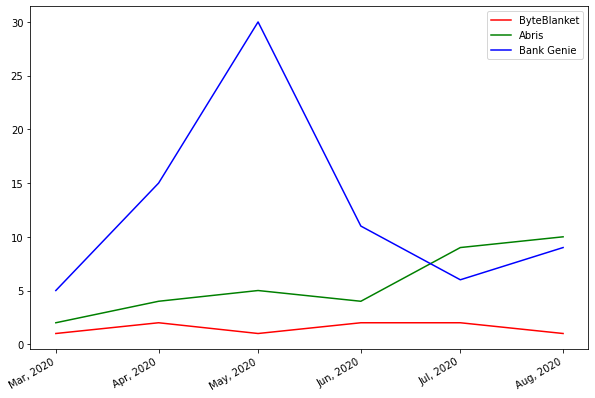

In [ ]:
#post frenquency linkedin
plt.plot_date(df_BBlinkedin['date'],df_BBlinkedin['number_of_posts_linkedIn'],'r',linestyle='solid')
plt.plot_date(df_Abrislinkedin['date'],df_Abrislinkedin['number_of_posts_linkedIn'],'g',linestyle='solid')
plt.plot_date(df_Bankgenielinkedin['date'],df_Bankgenielinkedin['number_of_posts_linkedIn'],'b',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(df_BBlinkedin['date'])
plt.legend(['ByteBlanket', 'Abris', 'Bank Genie'])
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('numofpostslinkedin.png', dpi=100)

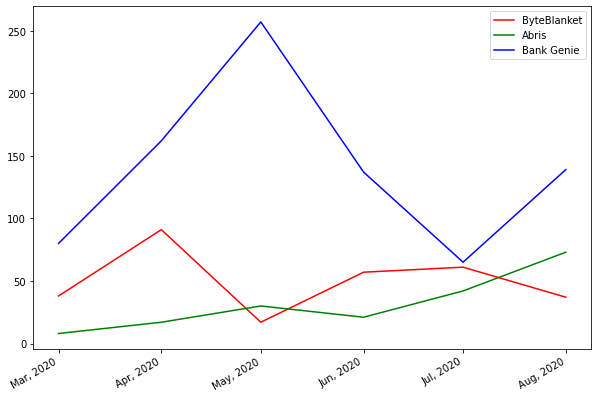

In [ ]:
#likes frenquency linkedin
plt.plot_date(df_BBlinkedin['date'],df_BBlinkedin['linkedin_likes'],'r',linestyle='solid')
plt.plot_date(df_Abrislinkedin['date'],df_Abrislinkedin['linkedin_likes'],'g',linestyle='solid')
plt.plot_date(df_Bankgenielinkedin['date'],df_Bankgenielinkedin['linkedin_linkes'],'b',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(df_BBlinkedin['date'])
plt.legend(['ByteBlanket', 'Abris', 'Bank Genie'])
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('postlikeslinkedin.png', dpi=100)

In [ ]:
df_BBlinkedin['like_ratio_linkedin'] = df_BBlinkedin['linkedin_likes']/df_BBlinkedin['number_of_posts_linkedIn']
df_Abrislinkedin['like_ratio_linkedin'] = df_Abrislinkedin['linkedin_likes']/df_Abrislinkedin['number_of_posts_linkedIn']
df_Bankgenielinkedin['like_ratio_linkedin'] = df_Bankgenielinkedin['linkedin_linkes']/df_Bankgenielinkedin['number_of_posts_linkedIn']

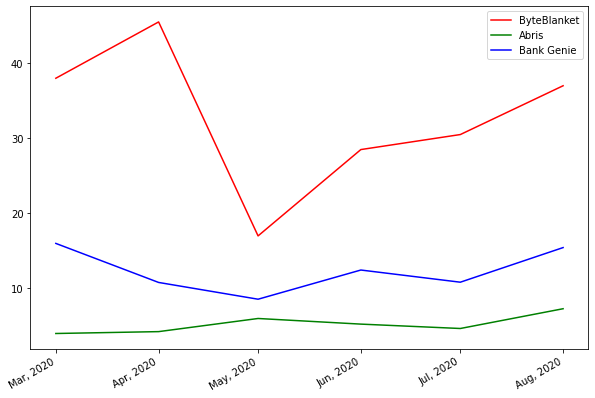

In [ ]:
#Like ratio frequency Linkedin
plt.plot_date(df_BBlinkedin['date'],df_BBlinkedin['like_ratio_linkedin'],'r',linestyle='solid')
plt.plot_date(df_Abrislinkedin['date'],df_Abrislinkedin['like_ratio_linkedin'],'g',linestyle='solid')
plt.plot_date(df_Bankgenielinkedin['date'],df_Bankgenielinkedin['like_ratio_linkedin'],'b',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(df_BBlinkedin['date'])
plt.legend(['ByteBlanket', 'Abris', 'Bank Genie'])
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('likeratiolinkedin.png', dpi=100)

##Facebook

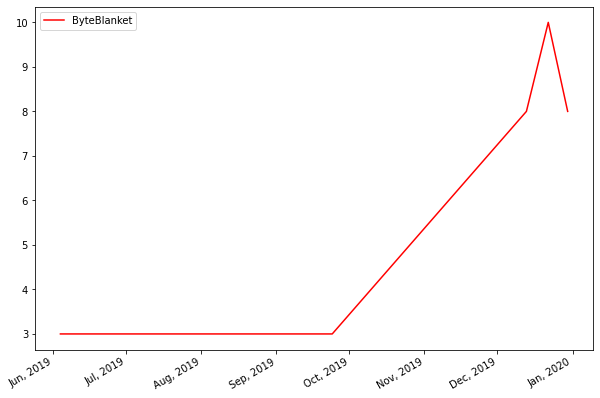

In [ ]:
#post frenquency linkedin
plt.plot_date(df_BBfacebook['Date'],df_BBfacebook['fb_likes'],'r',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.xticks(df_BBfacebook['Date'])
plt.legend(['ByteBlanket'])
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('postdataBBfacebook.png', dpi=100)

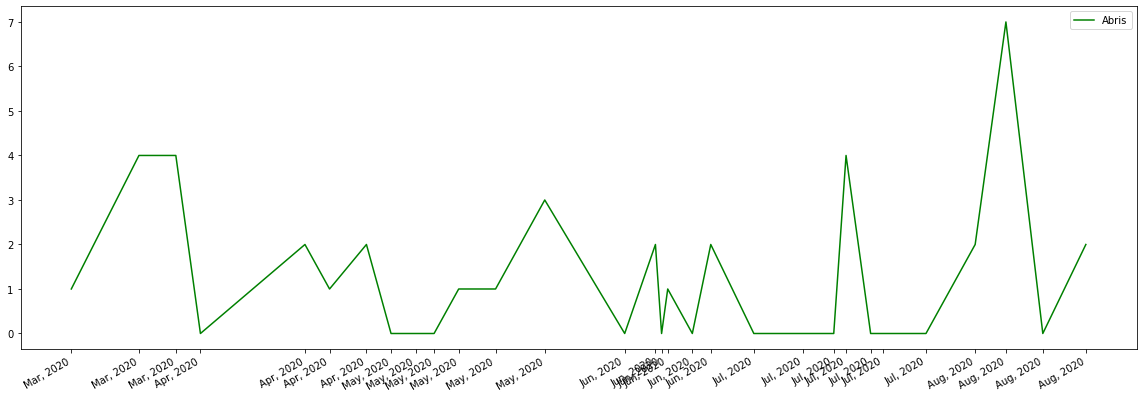

In [ ]:

plt.plot_date(df_Abrisfacebook['Date'],df_Abrisfacebook['fb_likes'],'g',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(df_Abrisfacebook['Date'])
plt.legend(['Abris'])
fig = plt.gcf()
fig.set_size_inches(20, 7)
fig.savefig('postdataAbfacebook.png', dpi=100)

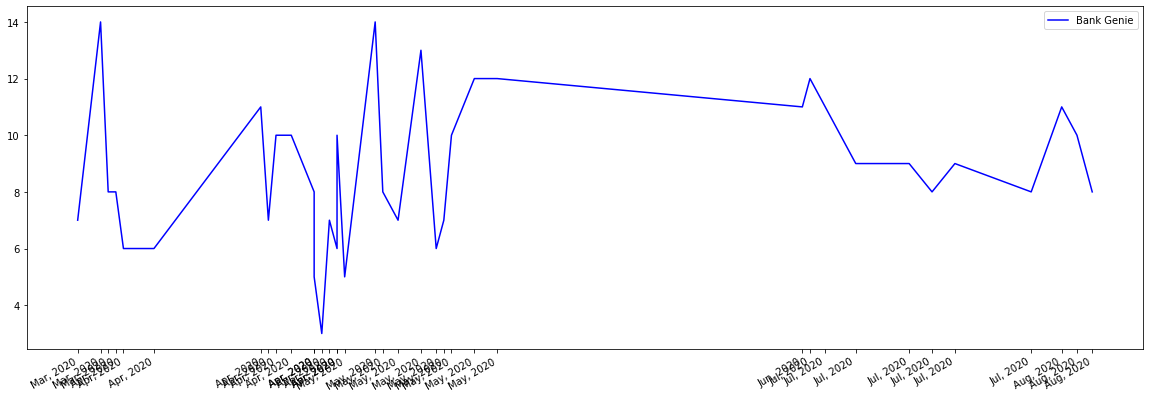

In [ ]:

plt.plot_date(df_Bankgeniefacebook['Date'],df_Bankgeniefacebook['fb_likes'],'b',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(df_Bankgeniefacebook['Date'])
plt.legend(['Bank Genie'])
fig = plt.gcf()
fig.set_size_inches(20, 7)
fig.savefig('postdatabgfacebook.png', dpi=100)

In [ ]:
df1 = df_BBfacebook.drop("Date",1)
df1 = df1.groupby("Post_type").sum()
df2 = df_Abrisfacebook.drop("Date",1)
df2 = df2.groupby("Post_type").sum()
df3 = df_Bankgeniefacebook.drop("Date",1)
df3 = df3.groupby("Post_type").sum()
df1.columns = ['Likes_ByteBlanket']
df2.columns = ['Likes_Abris']
df3.columns = ['Likes_Bankgenie']
df1.plot(kind = "bar")
df2.plot(kind = "bar")
df3.plot(kind = "bar")



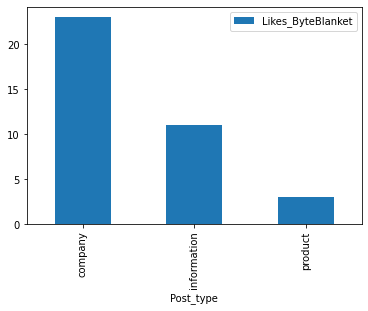

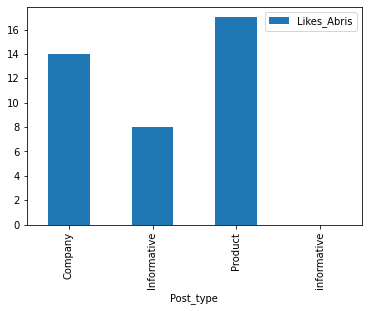

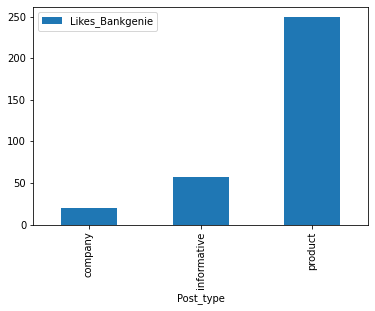

##Function for generating independant features

In [ ]:
   #Machine learning model
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
df_BBlinkedin['like_ratio_linkedin'] = df_BBlinkedin['like_ratio_linkedin'].astype(np.int64)
# define input sequence
timeseries_data = df_BBlinkedin['like_ratio_linkedin'].tolist()
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[38 45 17]
 [45 17 28]
 [17 28 30]]
[28 30 37]


(None, None)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

##Applying model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 978.8912
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 965.6501
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 951.4959
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 936.1935
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 919.8437
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 902.2693
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 883.3876
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 863.0472
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 841.1673
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 817.1727
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 790.9894
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 762.2381
Epoch 13/300
1/1 [===================

In [ ]:
df_BBlinkedin.tail()

,date,number_of_posts_linkedIn,linkedin_likes,like_ratio_linkedin
1,2020-04-01,2,91,45
2,2020-05-01,1,17,17
3,2020-06-01,2,57,28
4,2020-07-01,2,61,30
5,2020-08-01,1,37,37


In [ ]:
# demonstrate prediction for next 10 days
x_input = array([28,30,37])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<6):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[43.878006]
1 day input [30.         37.         43.87800598]
1 day output [[47.30385]]
2 day input [37.         43.87800598 47.30384827]
2 day output [[47.62279]]
3 day input [43.878006 47.30385  47.62279 ]
3 day output [[46.074238]]
4 day input [47.30385  47.62279  46.074238]
4 day output [[44.31334]]
5 day input [47.62279  46.074238 44.31334 ]
5 day output [[43.301075]]
[43.878006, 47.30385, 47.62279, 46.074238, 44.31334, 43.301075]


In [ ]:
df_pred = pd.read_excel('prediction_socialmedia.xlsx')
df_pred['date'] = pd.to_datetime(df_pred['date'])
df_pred['prediction'] = lst_output
df_pred.to_excel('prediction_socialmedia1.xlsx')

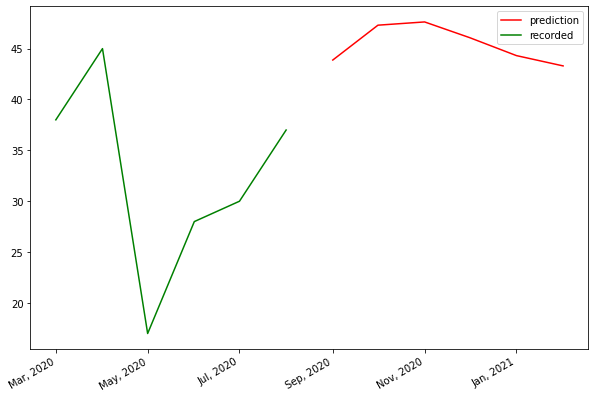

In [ ]:
plt.plot_date(df_pred['date'],lst_output,'r',linestyle='solid')
plt.plot_date(df_BBlinkedin['date'],df_BBlinkedin['like_ratio_linkedin'],'g',linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.xticks(df_byteblanket['date'])
plt.legend(['prediction','recorded'])
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('plotprediction.png', dpi=100)